In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
# Load IRIS dataset
DataIris = pd.read_csv('C:/Users/Chinmaya/IVY Python ML-Oct 2022/Python Datasets/Classification Datasets/IRIS.csv')
DataIris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Keeping the target variable for future references
TargetVariable=DataIris['Species']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=DataIris.drop('Species',axis=1)
OnlyPredictors.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Extracting the target variable array y and Predictor variables array X
y = TargetVariable.values
X = OnlyPredictors.values

# Printing top 10 sample values
print(X[0:10])
print(y[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa']


In [6]:
X.shape

(150, 4)

In [7]:
# Applying PCA
# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=X.shape[1])

# Fitting the data
pca_fit=pca.fit(X)

# Calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X are now represented by 4 Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[-2.68  0.32 -0.03 -0.  ]
 [-2.71 -0.18 -0.21 -0.1 ]
 [-2.89 -0.14  0.02 -0.02]
 [-2.75 -0.32  0.03  0.08]
 [-2.73  0.33  0.09  0.06]
 [-2.28  0.74  0.17  0.02]
 [-2.82 -0.09  0.26  0.05]
 [-2.63  0.16 -0.02  0.05]
 [-2.89 -0.58  0.02  0.03]
 [-2.67 -0.11 -0.2   0.06]]


In [8]:
reduced_X.shape

(150, 4)

In [9]:
# The amount of variance explained by each principal component
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))

# The first component and second component explain 92% and 5% variance of data respectively

[0.92 0.05 0.02 0.01]


In [10]:
# Cumulative variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[ 92.46  97.77  99.48 100.  ]


Text(0, 0.5, '% Variance explained')

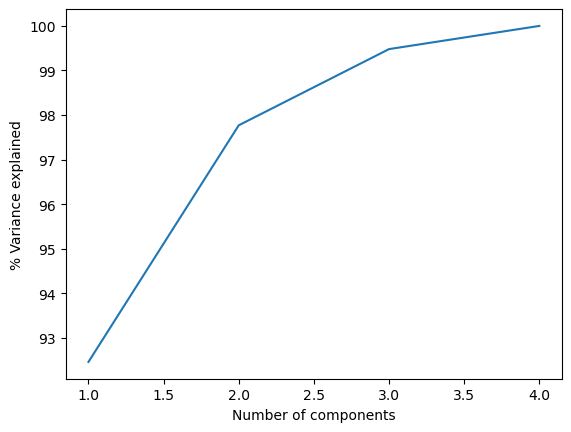

In [11]:
# Finding optimal number of Principal components
# By looking at the below graph we can see that 3 components are explaining maximum variance in the dataset
# The elbow occurs at 3rd principal component
plt.plot(range(1,5), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [12]:
# Creating final number of Principal components
# Choosing 3-Principal components based on above graph
pca = PCA(n_components=3)

# Fitting the data
pca_fit=pca.fit(X)

# Calculating the principal components
reduced_X = pca_fit.transform(X)

# 4 columns present in X are now represented by 3-Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[-2.68  0.32 -0.03]
 [-2.71 -0.18 -0.21]
 [-2.89 -0.14  0.02]
 [-2.75 -0.32  0.03]
 [-2.73  0.33  0.09]
 [-2.28  0.74  0.17]
 [-2.82 -0.09  0.26]
 [-2.63  0.16 -0.02]
 [-2.89 -0.58  0.02]
 [-2.67 -0.11 -0.2 ]]


In [13]:
# Printing the factor loadings
# The co-efficient which is multiplied with each column to get 3 Principal components
# For example PC1 = 0.36*(Sepal.Length) - 0.08*(Sepal.Width) + 0.85*(Petal.Length) + 0.35*(Petal.Width)
loadings = pca.components_
print(loadings)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]


In [15]:
#  Example
0.36138659*DataIris['Sepal.Length'] - 0.08452251*DataIris['Sepal.Width'] + 0.85667061*DataIris['Petal.Length'] + 0.3582892*DataIris['Petal.Width']

0      2.818240
1      2.788223
2      2.613375
3      2.757022
4      2.773649
         ...   
145    7.446475
146    7.029532
147    7.266711
148    7.403307
149    6.892554
Length: 150, dtype: float64

In [14]:
ReducedIris=pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3'])
ReducedIris['Species']=y
ReducedIris.head()

,PC1,PC2,PC3,Species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa


In [16]:
# Now any machine learning classification algorithm can be used on above data
# Corelation between any two PC will be zero
ReducedIris.corr()

,PC1,PC2,PC3
PC1,1.000000e+00,1.228066e-15,1.271111e-15
PC2,1.228066e-15,1.000000e+00,8.112912e-18
PC3,1.271111e-15,8.112912e-18,1.000000e+00


In [19]:
# Inverse transform
# We can get the original data from the principal components using inverse transform
OriginalData=pca_fit.inverse_transform(reduced_X)

In [20]:
# Printing sample rows
OriginalData[0:10]

array([[5.09928623, 3.50072335, 1.40108561, 0.1982949 ],
       [4.86875839, 3.03166108, 1.4475168 , 0.12536791],
       [4.69370023, 3.20638436, 1.30958161, 0.18495067],
       [4.6238432 , 3.07583667, 1.46373578, 0.25695828],
       [5.0193263 , 3.58041421, 1.37060574, 0.24616799],
       [5.40763506, 3.89226243, 1.68838749, 0.41823916],
       [4.61518853, 3.38460754, 1.37689906, 0.33628341],
       [5.0142909 , 3.38551722, 1.47826432, 0.23413908],
       [4.40843762, 2.89144909, 1.38716683, 0.22015637],
       [4.91776048, 3.08200106, 1.47298727, 0.14242745]])

In [21]:
# Comparing the above array with the original data
OnlyPredictors.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
